<a href="https://colab.research.google.com/github/ShionFujimori/covid19-analysis/blob/master/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insalling Prerequisite
1. Install libraries
2. Set up the kaggle API

In [2]:
# install libraries
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

# plotly: interactive graphing library for Python
import plotly.offline as py
import plotly.express as px

# install pycountry_convert library
!pip install pycountry_convert
import pycountry_convert as pc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 10.0MB 4.0MB/s 
     |████████████████████████████████| 235kB 52.1MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=8a4613b91948b564ae45966afdd36ed605f046e09f0c738efc51d321413dd224
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [0]:
# setup the kaggle API
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp 'drive/My Drive/Colab Notebooks/kaggle/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=08713a366a6951961723b444e3e53354ccfb4863aa6f55c5c05057503466be3c
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


# Novel Corona Virus 2019 Dataset by SRK
1. covid_19_data.csv

## Download the dataset

In [0]:
# load datasets (kaggle: Novel-Corona-Virus-2019-dataset managed by SRK)
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -f covid_19_data.csv

with zipfile.ZipFile('./covid_19_data.csv.zip', 'r') as zip_ref:
  zip_ref.extractall('./covid_19_data')

  0% 0.00/312k [00:00<?, ?B/s]
100% 312k/312k [00:00<00:00, 86.6MB/s]


## Overall Data Info
1. Read the csv file and observe the overall data
2. Observe the daily transition of COVID-19 cases

In [0]:
# obtain data using Pandas
data = pd.read_csv("./covid_19_data/covid_19_data.csv", index_col="SNo", parse_dates=["ObservationDate"])
print(f"Data shape: {data.shape}\n")

data

Data shape: (26336, 7)



,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
26332,2020-05-18,Wyoming,US,2020-05-19 02:32:18,766.0,10.0,0.0
26333,2020-05-18,Xinjiang,Mainland China,2020-05-19 02:32:18,76.0,3.0,73.0
26334,2020-05-18,Yukon,Canada,2020-05-19 02:32:18,11.0,0.0,11.0


In [0]:
# summary function (not very useful here)
data.describe()

,Confirmed,Deaths,Recovered
count,26336.000000,26336.000000,26336.000000
mean,5586.147327,366.422388,1697.725813
std,23153.458470,2195.519751,10691.560912
min,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000
50%,187.000000,3.000000,7.000000
75%,1308.250000,26.000000,181.000000
max,351371.000000,34796.000000,283178.000000


In [0]:
# obtain ObservationDate vs (Confirmed/Deaths/Recovered) data
confirmed_vs_date = data.groupby("ObservationDate").Confirmed.sum()
deaths_vs_date = data.groupby("ObservationDate").Deaths.sum()
recovered_vs_date = data.groupby("ObservationDate").Recovered.sum()

daily_data = pd.concat([confirmed_vs_date, deaths_vs_date, recovered_vs_date], axis=1).astype("int32")
daily_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555,17,28
2020-01-23,653,18,30
2020-01-24,941,26,36
2020-01-25,1438,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-05-14,4442163,302418,1587893
2020-05-15,4542347,307666,1637067
2020-05-16,4634068,311781,1693197


## Visualize the data
1. Cumulative Confirmed Cases vs Observation Date
2. Cumulative Deaths vs Observation Date
3. Cumulative Recovered Cases vs Observation Date

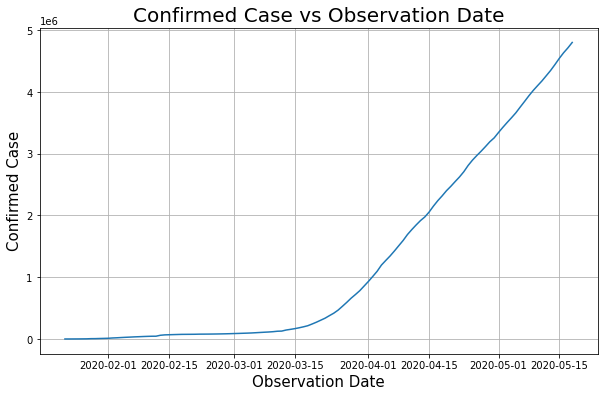

In [0]:
# visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Confirmed)
plt.grid()
plt.title("Confirmed Case vs Observation Date", fontsize=20)
plt.ylabel("Confirmed Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

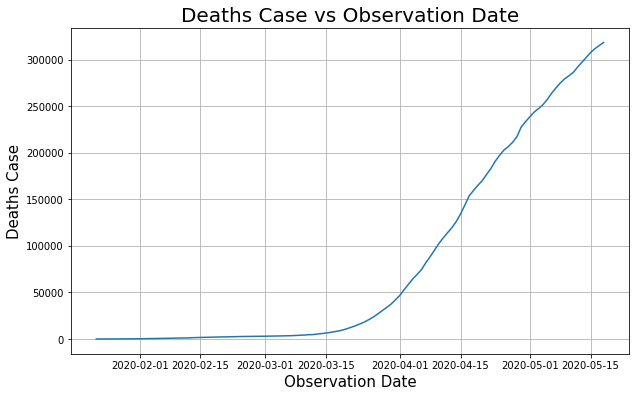

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Deaths)
plt.grid()
plt.title("Deaths Case vs Observation Date", fontsize=20)
plt.ylabel("Deaths Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

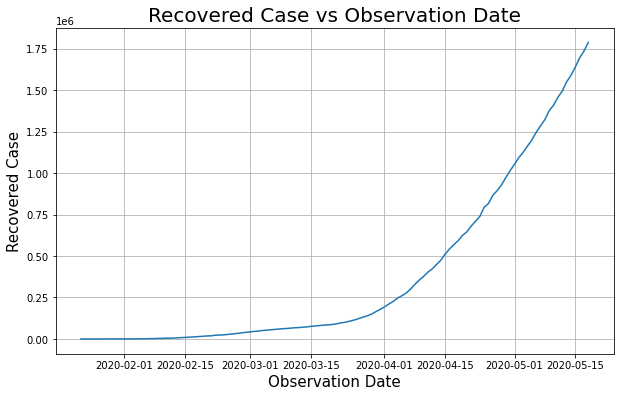

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Recovered)
plt.grid()
plt.title("Recovered Case vs Observation Date", fontsize=20)
plt.ylabel("Recovered Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

## Daily transition of COVID-19 cases
1. Group the data by observed date and country
2. China -- daily transition
3. USA -- daily transition
4. Japan -- daily transition

In [0]:
# Group the data by ObservationDate and Country/Region
daily_country_data = data.groupby(["ObservationDate", "Country/Region"]) \
                    [["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

daily_country_data

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Hong Kong,0.0,0.0,0.0
1,2020-01-22,Japan,2.0,0.0,0.0
2,2020-01-22,Macau,1.0,0.0,0.0
3,2020-01-22,Mainland China,547.0,17.0,28.0
4,2020-01-22,South Korea,1.0,0.0,0.0
...,...,...,...,...,...
14506,2020-05-18,West Bank and Gaza,388.0,2.0,337.0
14507,2020-05-18,Western Sahara,6.0,0.0,6.0
14508,2020-05-18,Yemen,130.0,20.0,1.0
14509,2020-05-18,Zambia,761.0,7.0,192.0


In [0]:
# Example 1: China -- daily transition
daily_country_data.query('`Country/Region` == "Mainland China"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,Mainland China,547.0,17.0,28.0
2020-01-23,Mainland China,639.0,18.0,30.0
2020-01-24,Mainland China,916.0,26.0,36.0
2020-01-25,Mainland China,1399.0,42.0,39.0
2020-01-26,Mainland China,2062.0,56.0,49.0
...,...,...,...,...
2020-05-14,Mainland China,82933.0,4633.0,78209.0
2020-05-15,Mainland China,82941.0,4633.0,78219.0
2020-05-16,Mainland China,82947.0,4634.0,78227.0


In [0]:
# Example 2: US -- daily transition
daily_country_data.query('`Country/Region` == "US"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,US,1.0,0.0,0.0
2020-01-23,US,1.0,0.0,0.0
2020-01-24,US,2.0,0.0,0.0
2020-01-25,US,2.0,0.0,0.0
2020-01-26,US,5.0,0.0,0.0
...,...,...,...,...
2020-05-14,US,1417774.0,85898.0,246414.0
2020-05-15,US,1442824.0,87530.0,250747.0
2020-05-16,US,1467820.0,88754.0,268376.0


In [0]:
# Example 3: Japan -- daily transition
daily_country_data.query('`Country/Region` == "Japan"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,Japan,2.0,0.0,0.0
2020-01-23,Japan,1.0,0.0,0.0
2020-01-24,Japan,2.0,0.0,0.0
2020-01-25,Japan,2.0,0.0,0.0
2020-01-26,Japan,4.0,0.0,1.0
...,...,...,...,...
2020-05-14,Japan,16120.0,697.0,9868.0
2020-05-15,Japan,16203.0,713.0,10338.0
2020-05-16,Japan,16237.0,725.0,10338.0


## Choropleth Graph
1. The Spread of COVID-19 Cases Across World
2. The Spread of COVID-19 Deaths Across World
3. The COVID-19 Recovery Rate Across World

In [0]:
# obtain a copy of daily_country_data
choropleth_data = daily_country_data.copy()

# fix ObservationDate datatype from Timesatmp to String
choropleth_data.ObservationDate = choropleth_data.ObservationDate.astype(str)

# take logarithms (Confirmed, Deaths, Recovered)
choropleth_data["Confirmed (logarithmic scale)"] = np.log1p(choropleth_data.Confirmed)
choropleth_data["Deaths (logarithmic scale)"] = np.log1p(choropleth_data.Deaths)
choropleth_data["Recovered (logarithmic scale)"] = np.log1p(choropleth_data.Recovered)

# calculate the recovery rate
choropleth_data["RecoveryRate"] = (choropleth_data.Recovered / (choropleth_data.Confirmed+1e-6)).round(3)

In [0]:
# Plotting a Running Map for observing the spread of COVID-19 Confirmed Cases
fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Confirmed (logarithmic scale)", 
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Cases Across World')

py.offline.iplot(fig)

In [0]:
# Plotting a Running Map for observing the spread of COVID-19 deaths
fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Deaths (logarithmic scale)",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Deaths Across World')

py.offline.iplot(fig)

In [0]:
# Plotting a Running Map for observing the COVID-19 recovery rate
fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="RecoveryRate",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The COVID-19 Recovery Rate Across World')

py.offline.iplot(fig)

## Country-wise reported cases

In [0]:
newest_date = daily_country_data.ObservationDate.iloc[-1]

countrywise_data = daily_country_data.query("ObservationDate == @newest_date")
countrywise_data = countrywise_data.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered"]].sum()
countrywise_data = countrywise_data.sort_values("Confirmed", ascending=False).astype("int32")

# Add "Active" cases column
countrywise_data["Active"] = \
  (countrywise_data.Confirmed - countrywise_data.Deaths - countrywise_data.Recovered).astype("int32")

# Add "MortalityRate(%)" column
countrywise_data["MortalityRate(%)"] = \
  (100 * countrywise_data.Deaths / countrywise_data.Confirmed).round(1)

# Color the background in a gradient
countrywise_data.style \
  .background_gradient(cmap='Blues',subset=["Confirmed"]) \
  .background_gradient(cmap='Reds',subset=["Deaths"]) \
  .background_gradient(cmap='Greens',subset=["Recovered"]) \
  .background_gradient(cmap='Oranges',subset=["Active"]) \
  .background_gradient(cmap='Purples',subset=["MortalityRate(%)"])

,Confirmed,Deaths,Recovered,Active,MortalityRate(%)
Country/Region,,,,,
US,1508308,90347,283178,1134783,6.000000
Russia,290678,2722,70209,217747,0.900000
Brazil,255368,16853,100459,138056,6.600000
UK,247709,34876,1090,211743,14.100000
Spain,231606,27709,150376,53521,12.000000
Italy,225886,32007,127326,66553,14.200000
France,180051,28242,61843,89966,15.700000
Germany,176551,8003,155041,13507,4.500000
Turkey,150593,4171,111577,34845,2.800000


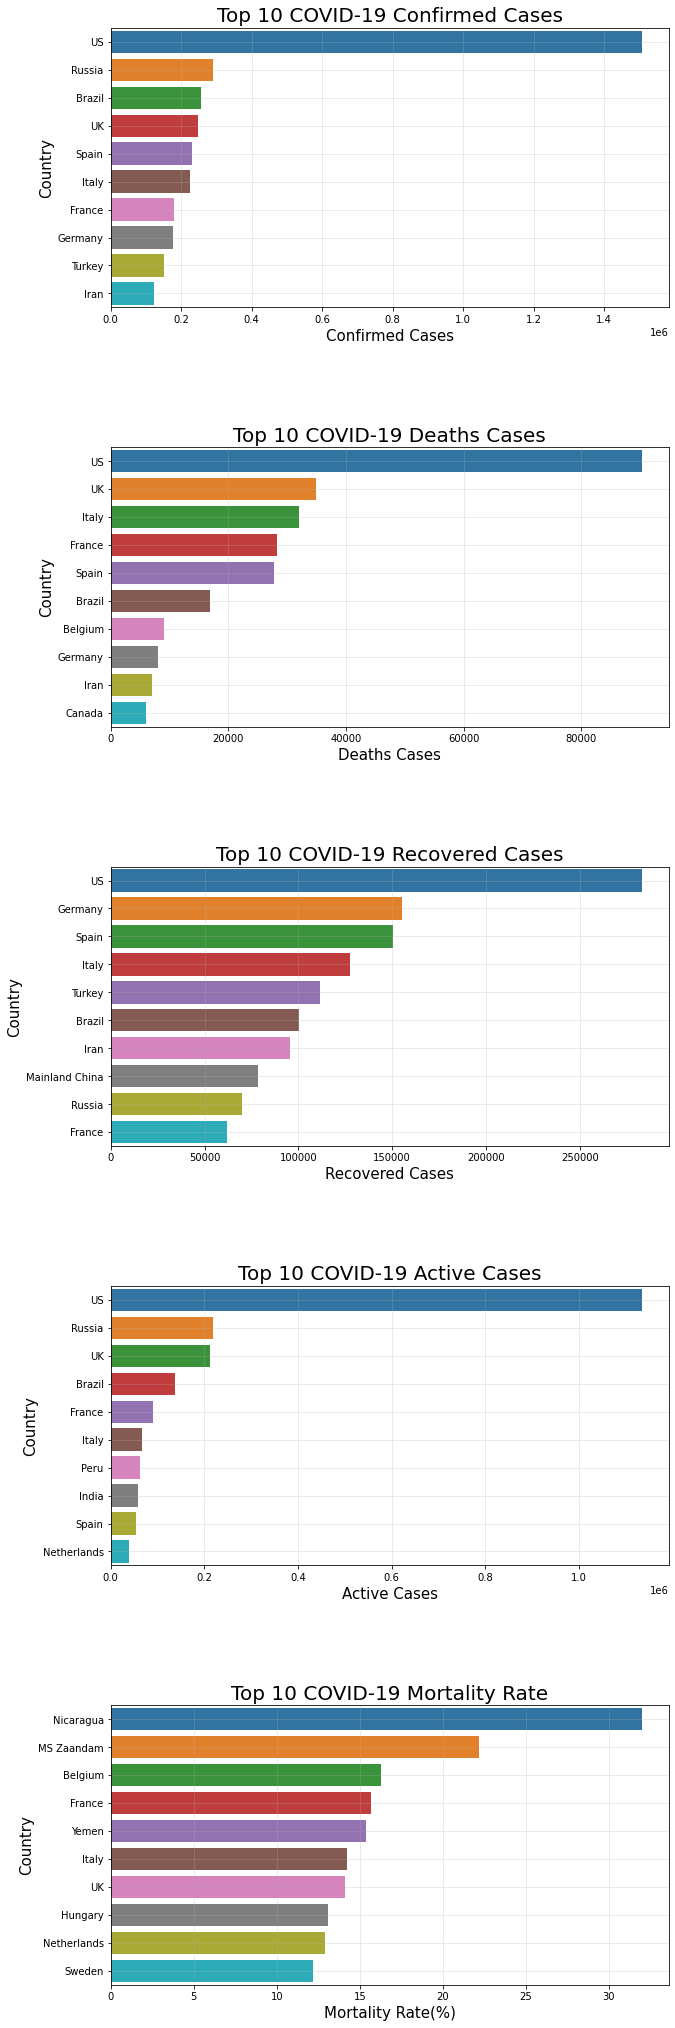

In [0]:
# === Top 10 bar plots ===
fig = plt.figure(figsize=(10, 36))

# Confirmed cases
sns.barplot(x=countrywise_data["Confirmed"][:10], 
            y=countrywise_data.index[:10],
            ax=fig.add_subplot(5, 1, 1))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Confirmed Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Confirmed Cases", fontsize=15)

# Deaths cases
temp = countrywise_data.sort_values("Deaths", ascending=False)
sns.barplot(x=temp["Deaths"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 2))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Deaths Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Deaths Cases", fontsize=15)

# Recovered cases
temp = countrywise_data.sort_values("Recovered", ascending=False)
sns.barplot(x=temp["Recovered"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 3))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Recovered Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Recovered Cases", fontsize=15)

# Active cases
temp = countrywise_data.sort_values("Active", ascending=False)
sns.barplot(x=temp["Active"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 4))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Active Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Active Cases", fontsize=15)

# Mortality rate
temp = countrywise_data.sort_values("MortalityRate(%)", ascending=False)
sns.barplot(x=temp["MortalityRate(%)"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 5))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Mortality Rate", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Mortality Rate(%)", fontsize=15)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [0]:
# country-wise correlation
countrywise_data.corr().style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active,MortalityRate(%)
Confirmed,1.000000,0.933603,0.845759,0.979832,0.139219
Deaths,0.933603,1.000000,0.813129,0.894309,0.272665
Recovered,0.845759,0.813129,1.000000,0.723559,0.178975
Active,0.979832,0.894309,0.723559,1.000000,0.100979
MortalityRate(%),0.139219,0.272665,0.178975,0.100979,1.000000


# COVID-19 Data Repository by Johns Hopkins CSSE
1. time_series_covid19_confirmed_global.csv
2. time_series_covid19_deaths_global.csv
3. time_series_covid19_recovered_global.csv
4. time_series_covid19_confirmed_US.csv
5. time_series_covid19_deaths_US.csv

## Download the dataset

In [0]:
# load datasets (2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE)

df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
us_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
us_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

## Preprocessing the data
Global data:
1. Simplify the column name
2. Drop irrelevant columns
3. Group by country
4. Add "Continent" column

USA data:
1. Simplify the column name
2. Drop irrelevant columns
3. Group by country
4. Add "Population" column in us_confirmed

In [0]:
# === Global data preprocessing ===

# change the column name
df_confirmed = df_confirmed.rename(columns={"Country/Region": "Country"})
df_deaths = df_deaths.rename(columns={"Country/Region": "Country"})
df_recovered = df_recovered.rename(columns={"Country/Region": "Country"})

# drop irrelevant columns
df_confirmed = df_confirmed.drop(["Lat", "Long", "Province/State"], axis=1)
df_deaths = df_deaths.drop(["Lat", "Long", "Province/State"], axis=1)
df_recovered = df_recovered.drop(["Lat", "Long", "Province/State"], axis=1)

# group by country 
df_confirmed = df_confirmed.groupby("Country").sum().reset_index()
df_deaths = df_deaths.groupby("Country").sum().reset_index()
df_recovered = df_recovered.groupby("Country").sum().reset_index()

# pycountry_convert - Library for getting continent name from their country names
# Changing the conuntry names as required by pycountry_convert Library
# "US"                  -> "USA"
# "Korea, South"        -> "South Korea"
# "Taiwan*"             -> "Taiwan"
# "Congo (Kinshasa)"    -> "Democratic Republic of the Congo"
# "Cote d'Ivoire"       -> "Côte d'Ivoire"
# "Reunion"             -> "Réunion"
# "Congo (Brazzaville)" -> "Republic of the Congo"
# "Bahamas, The"        -> "Bahamas"
# "Gambia, The"         -> "Gambia"
df_confirmed.loc[df_confirmed.Country == "US", "Country"] = "USA"
df_confirmed.loc[df_confirmed.Country == "Korea, South", "Country"] = "South Korea"
df_confirmed.loc[df_confirmed.Country == "Taiwan*", "Country"] = "Taiwan"
df_confirmed.loc[df_confirmed.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_confirmed.loc[df_confirmed.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_confirmed.loc[df_confirmed.Country == "Reunion", "Country"] = "Réunion"
df_confirmed.loc[df_confirmed.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_confirmed.loc[df_confirmed.Country == "Bahamas, The", "Country"] = "Bahamas"
df_confirmed.loc[df_confirmed.Country == "Gambia, The", "Country"] = "Gambia"

df_deaths.loc[df_deaths.Country == "US", "Country"] = "USA"
df_deaths.loc[df_deaths.Country == "Korea, South", "Country"] = "South Korea"
df_deaths.loc[df_deaths.Country == "Taiwan*", "Country"] = "Taiwan"
df_deaths.loc[df_deaths.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_deaths.loc[df_deaths.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths.Country == "Reunion", "Country"] = "Réunion"
df_deaths.loc[df_deaths.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_deaths.loc[df_deaths.Country == "Bahamas, The", "Country"] = "Bahamas"
df_deaths.loc[df_deaths.Country == "Gambia, The", "Country"] = "Gambia"

df_recovered.loc[df_recovered.Country == "US", "Country"] = "USA"
df_recovered.loc[df_recovered.Country == "Korea, South", "Country"] = "South Korea"
df_recovered.loc[df_recovered.Country == "Taiwan*", "Country"] = "Taiwan"
df_recovered.loc[df_recovered.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_recovered.loc[df_recovered.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered.Country == "Reunion", "Country"] = "Réunion"
df_recovered.loc[df_recovered.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_recovered.loc[df_recovered.Country == "Bahamas, The", "Country"] = "Bahamas"
df_recovered.loc[df_recovered.Country == "Gambia, The", "Country"] = "Gambia"

# continent code -> continent name
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# country name -> continent name
def cont_convert(country):
    try:
        continent_code = pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
        return continents[continent_code]
    except :
        return "Others"

# inserting "Continent" column
df_confirmed.insert(1, "Continent", [cont_convert(country) for country in np.asarray(df_confirmed.Country)])
df_deaths.insert(1, "Continent",  [cont_convert(country) for country in np.asarray(df_deaths.Country)])
df_recovered.insert(1,"Continent",  [cont_convert(country) for country in np.asarray(df_recovered.Country)])

In [5]:
# visualize the global data after preprocessing
df_confirmed.sort_values(df_confirmed.columns[-1], ascending=False)

,Country,Continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
174,USA,North America,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,...,1012582,1039909,1069424,1103461,1132539,1158040,1180375,1204351,1229331,1257023,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757,1508308,1528568,1551853,1577147,1600937,1622612,1643246,1662302,1680913,1699176,1721753,1746019,1770165,1790172,1811020,1831821,1851520,1872660,1897380,1920061
23,Brazil,South America,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,73235,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890,347398,363211,374898,391222,411821,438238,465166,498440,514849,526447,555383,584016,614941,645771,672846
140,Russia,Europe,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,93558,99399,106498,114431,124054,134687,145268,155370,165929,177160,187859,198676,209688,221344,232243,242271,252245,262843,272043,281752,290678,299941,308705,317554,326448,335882,344481,353427,362342,370680,379051,387623,396575,405843,414328,423186,431715,440538,449256,458102
178,United Kingdom,Europe,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,...,162350,166441,172481,178685,183500,187842,191832,196243,202359,207977,212629,216525,220449,224332,227741,230985,234440,238004,241461,244995,247709,250138,249619,252246,255544,258504,260916,262547,266599,268619,270508,272607,274219,276156,277736,279392,281270,283079,284734,286294
79,India,Asia,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,31324,33062,34863,37257,39699,42505,46437,49400,52987,56351,59695,62808,67161,70768,74292,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Seychelles,Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
104,MS Zaandam,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
184,Western Sahara,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9,9,9,9,9,9,9,9,9,9,9,9,9
132,Papua New Guinea,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [0]:
# === USA data preprocessing ===

# change the column name
us_confirmed = us_confirmed.rename(columns={"Province_State": "State"})
us_deaths = us_deaths.rename(columns={"Province_State": "State"})

# drop irrelevant columns
us_confirmed = us_confirmed.drop(["UID", "iso2", "iso3", "code3", "FIPS",
                                  "Admin2", "Lat", "Long_", "Combined_Key", 
                                  "Country_Region"], axis=1)
us_deaths = us_deaths.drop(["UID", "iso2", "iso3", "code3", "FIPS",
                                  "Admin2", "Lat", "Long_", "Combined_Key", 
                                  "Country_Region"], axis=1)

# group by country 
us_confirmed = us_confirmed.groupby("State").sum().reset_index()
us_deaths = us_deaths.groupby("State").sum().reset_index()

# Add "Population" column in us_confirmed
us_confirmed.insert(1, "Population", us_deaths.Population)

In [7]:
# visualize the USA data after preprocessing
us_confirmed.sort_values(us_confirmed.columns[-1], ascending=False).head()

,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
36,New York,26161672,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,295106,299691,304372,308314,312977,316415,318953,321192,323978,327469,330407,333122,335395,337055,338485,340661,343051,345813,348232,350121,351371,352845,354370,356458,358154,359926,361515,362764,363836,364965,366733,368284,369660,370770,371711,373040,374085,375133,376208,377316
34,New Jersey,8882190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113856,116365,118652,121190,123717,126744,128269,130593,131890,133991,135840,137397,138754,140206,140917,141560,142704,143984,145089,146504,148240,149356,150776,151586,152579,153140,154154,155092,155764,156628,157185,158844,159608,160445,160918,161545,162068,162530,163336,163893
5,California,39512223,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,...,46164,48747,50130,52026,53347,54903,55884,58456,60616,62148,63779,66558,67600,69329,70978,72798,74871,76693,78725,80166,81457,83752,85997,88031,90252,92539,94020,96400,99387,101050,103813,106622,109895,111951,114733,117215,119348,122168,125738,128593
17,Illinois,12671821,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,48102,50358,52918,56055,58505,61499,63777,65889,68232,70871,73760,76085,77741,79007,83021,84694,87937,90369,92457,94191,96485,98030,100418,102688,105444,107796,110304,112017,113195,114306,115833,117455,118917,120260,121234,122848,123830,124759,125915,126890
25,Massachusetts,6892503,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,58302,60265,62205,64311,66263,68087,69087,70271,72025,73721,75333,76743,77793,78462,79332,80497,82182,83421,84933,86010,87052,87925,88970,90084,90889,91662,92675,93271,93693,94220,94895,95512,96301,96965,100805,101163,101592,102063,102557,103132


## Spread Trends
1. Number of countries affected over the time (Confirmed cases)
2. Number of countries affected over the time (Deaths cases)
3. Spread across Europe
4. Spread across Asia
5. Spread across North/South America

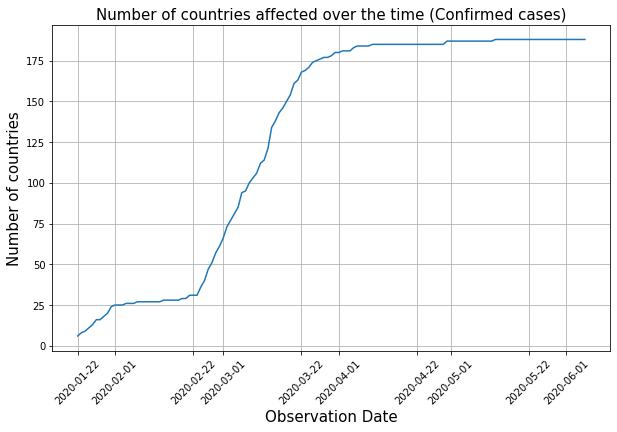

In [19]:
# Number of countries affected (confirmed cases)
num_country_confirmed = df_confirmed.set_index("Country") \
                            .drop(["Continent"], axis=1) \
                            .apply(lambda x: x[x > 0].count(), axis="index")
num_country_confirmed.index = pd.to_datetime(num_country_confirmed.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=num_country_confirmed)
plt.grid()
plt.xticks(rotation=45)
plt.title("Number of countries affected over the time (Confirmed cases)", fontsize=15)
plt.ylabel("Number of countries", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

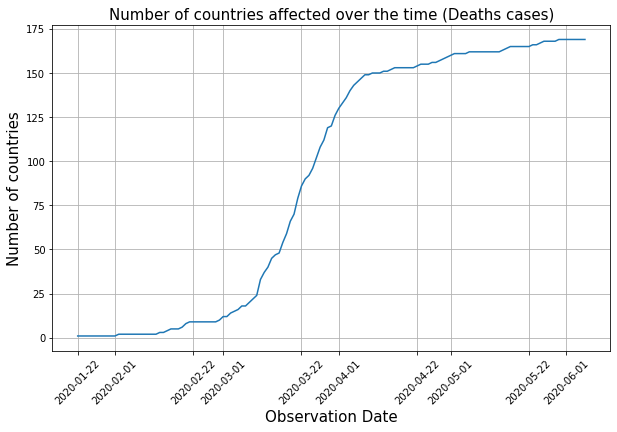

In [20]:
# Number of countries affected (deaths cases)
num_country_deaths = df_deaths.set_index("Country") \
                              .drop(["Continent"], axis=1) \
                              .apply(lambda x: x[x > 0].count(), axis="index")
num_country_deaths.index = pd.to_datetime(num_country_deaths.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=num_country_deaths)
plt.grid()
plt.xticks(rotation=45)
plt.title("Number of countries affected over the time (Deaths cases)", fontsize=15)
plt.ylabel("Number of countries", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

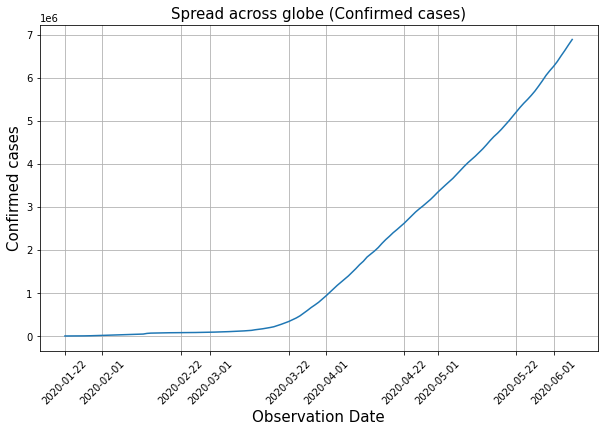

In [21]:
# Spread across globe (Confirmed cases)
global_confirmed = df_confirmed.drop(["Country", "Continent"], axis=1).sum()
global_confirmed.index = pd.to_datetime(global_confirmed.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=global_confirmed)
plt.grid()
plt.xticks(rotation=45)
plt.title("Spread across globe (Confirmed cases)", fontsize=15)
plt.ylabel("Confirmed cases", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

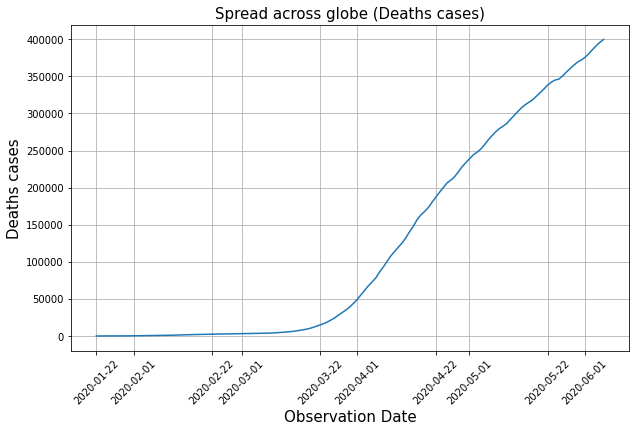

In [22]:
# Spread across globe (Deaths cases)
global_deaths = df_deaths.drop(["Country", "Continent"], axis=1).sum()
global_deaths.index = pd.to_datetime(global_deaths.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=global_deaths)
plt.grid()
plt.xticks(rotation=45)
plt.title("Spread across globe (Deaths cases)", fontsize=15)
plt.ylabel("Deaths cases", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

### Spread across different continents

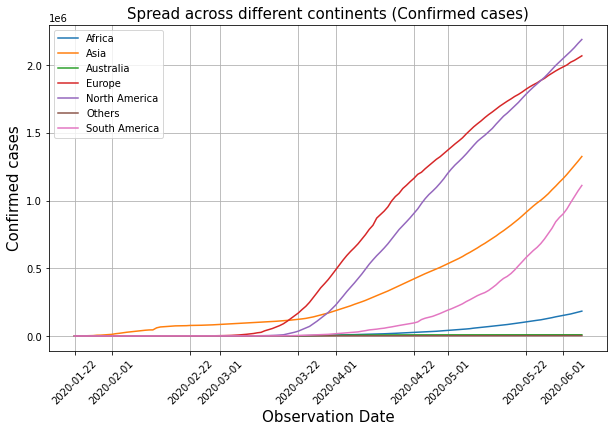

In [23]:
# Spread across continents
continents_confirmed = df_confirmed.drop(["Country"], axis=1).groupby("Continent").sum()

plt.figure(figsize=(10, 6))
for cont in continents_confirmed.index:
  sns.lineplot(x=pd.to_datetime(continents_confirmed.columns), y=continents_confirmed.loc[cont, :], label=cont)
plt.grid()
plt.xticks(rotation=45)
plt.title("Spread across different continents (Confirmed cases)", fontsize=15)
plt.ylabel("Confirmed cases", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

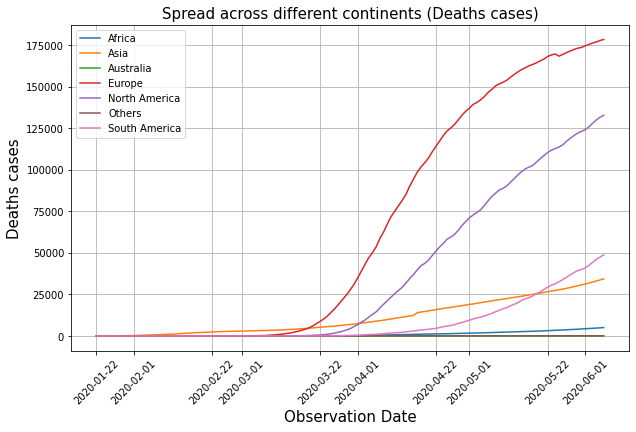

In [24]:
# Spread across continents (Deaths)
continents_deaths = df_deaths.drop(["Country"], axis=1).groupby("Continent").sum()

plt.figure(figsize=(10, 6))
for cont in continents_deaths.index:
  sns.lineplot(x=pd.to_datetime(continents_deaths.columns), y=continents_deaths.loc[cont, :], label=cont)
plt.grid()
plt.xticks(rotation=45)
plt.title("Spread across different continents (Deaths cases)", fontsize=15)
plt.ylabel("Deaths cases", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

### Spread across Europe 

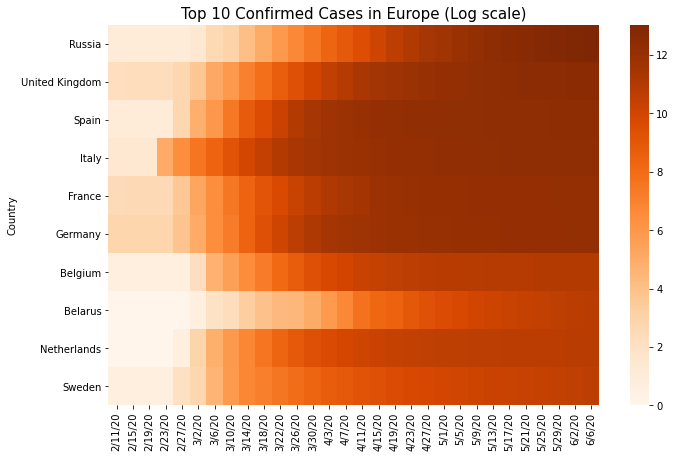

In [14]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Continent == 'Europe'") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

europe_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = europe_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in Europe (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

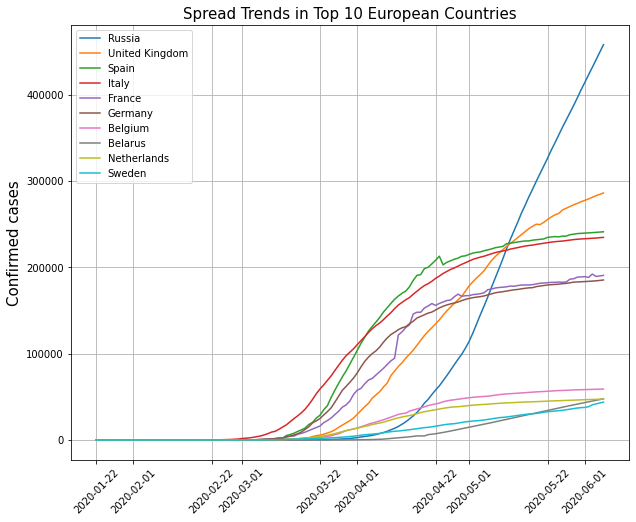

In [25]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in europe_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(europe_confirmed_top.columns), y=europe_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 European Countries", fontsize=15)
plt.show()

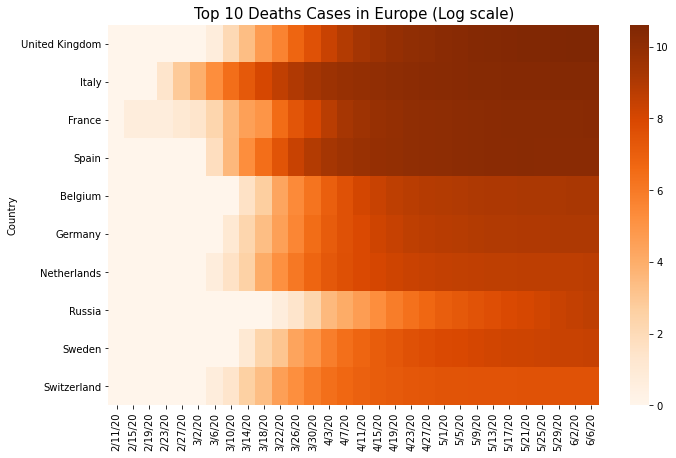

In [16]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Continent == 'Europe'") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

europe_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = europe_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in Europe (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

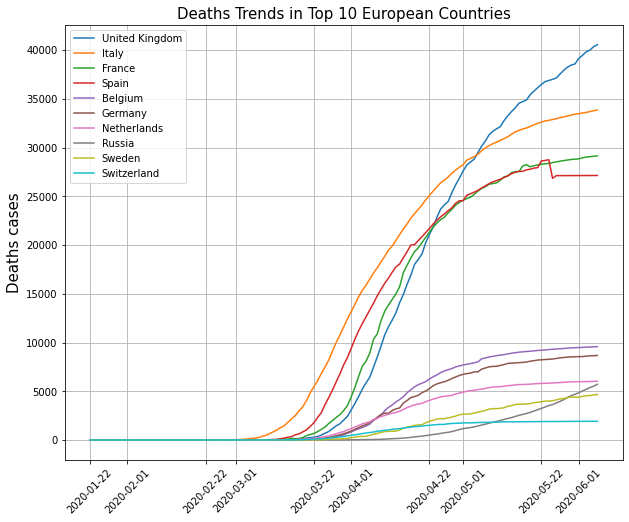

In [26]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in europe_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(europe_deaths_top.columns), y=europe_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 European Countries", fontsize=15)
plt.show()

### Spread across Asia

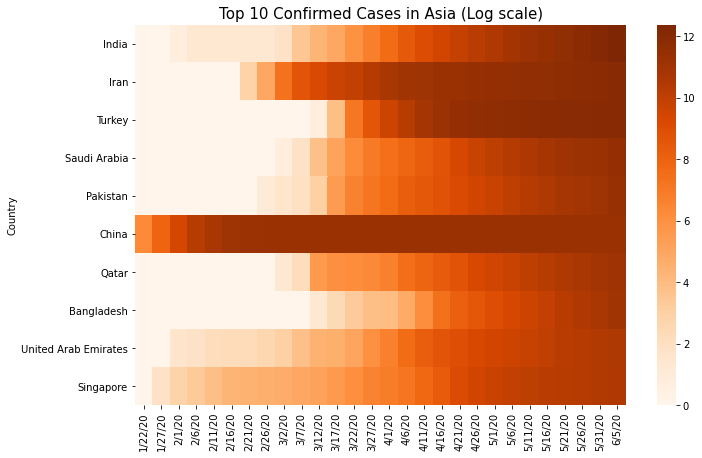

In [28]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Continent == 'Asia'") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

asia_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = asia_confirmed_top.iloc[:, ::5]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in Asia (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

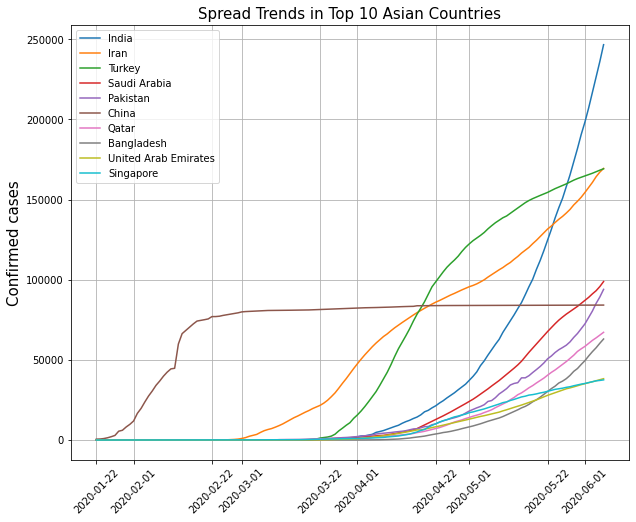

In [30]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in asia_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(asia_confirmed_top.columns), y=asia_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 Asian Countries", fontsize=15)
plt.show()

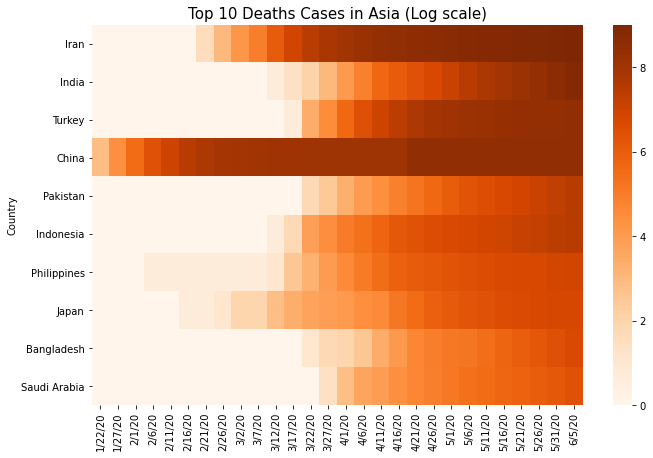

In [31]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Continent == 'Asia'") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

asia_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = asia_deaths_top.iloc[:, ::5]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in Asia (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

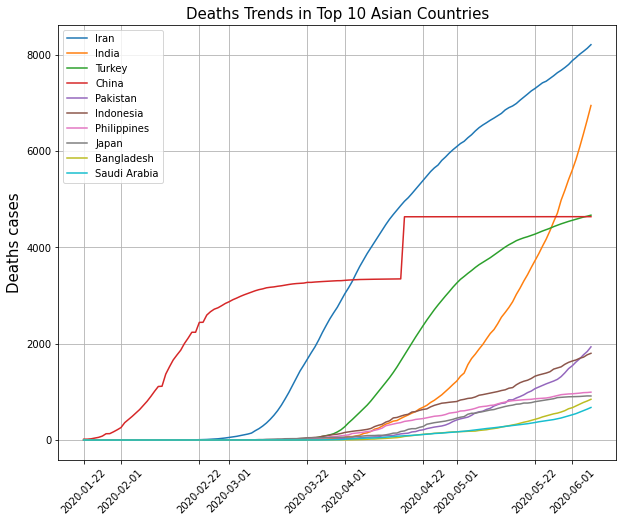

In [32]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in asia_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(asia_deaths_top.columns), y=asia_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 Asian Countries", fontsize=15)
plt.show()

### Spread across North/South America (exclude USA)

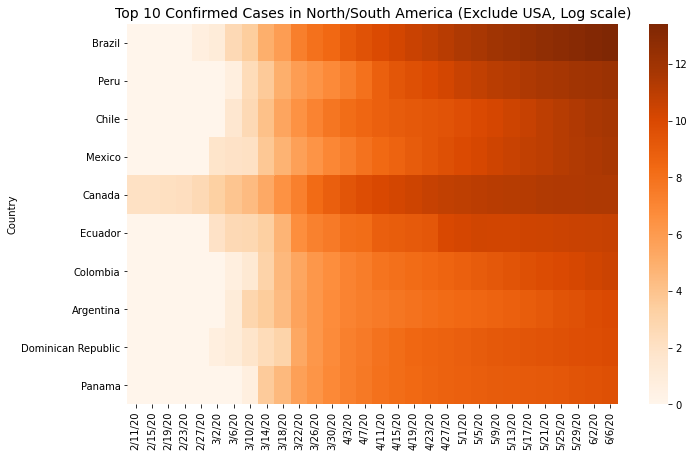

In [33]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Country != 'USA'") \
  .query("Continent in ['North America', 'South America']") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

america_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = america_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in North/South America (Exclude USA, Log scale)", fontsize=14)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

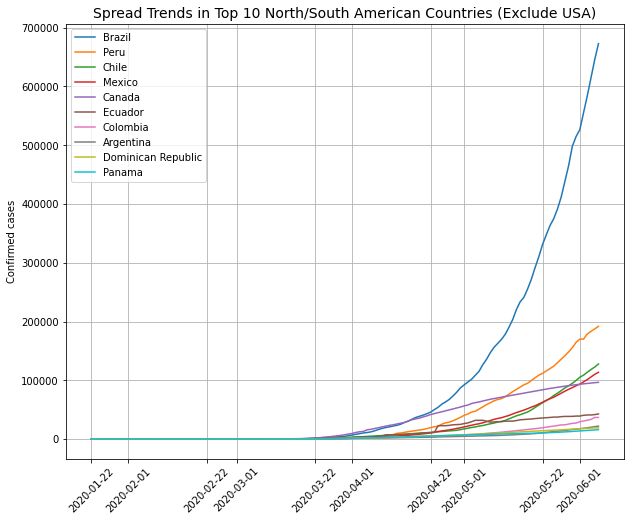

In [34]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in america_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(america_confirmed_top.columns), y=america_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=10)
plt.title("Spread Trends in Top 10 North/South American Countries (Exclude USA)", fontsize=14)
plt.show()

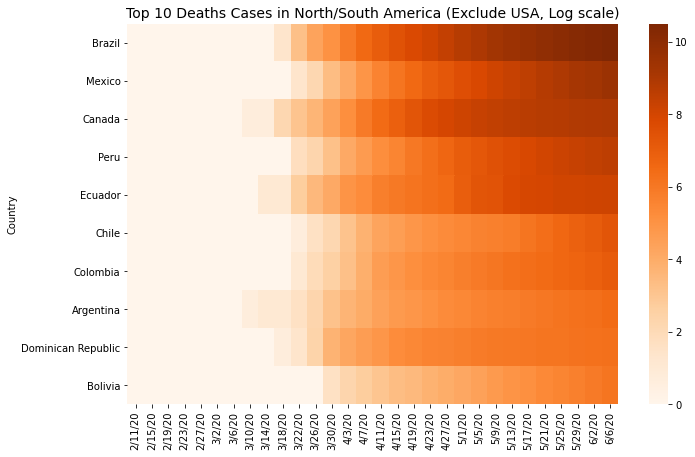

In [35]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Country != 'USA'") \
  .query("Continent in ['North America', 'South America']") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

america_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = america_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in North/South America (Exclude USA, Log scale)", fontsize=14)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

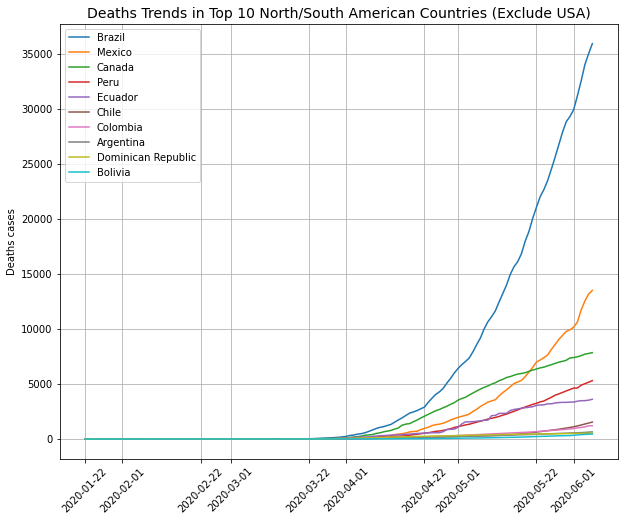

In [41]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in america_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(america_deaths_top.columns), y=america_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=10)
plt.title("Deaths Trends in Top 10 North/South American Countries (Exclude USA)", fontsize=14)
plt.show()

### Spread across Africa

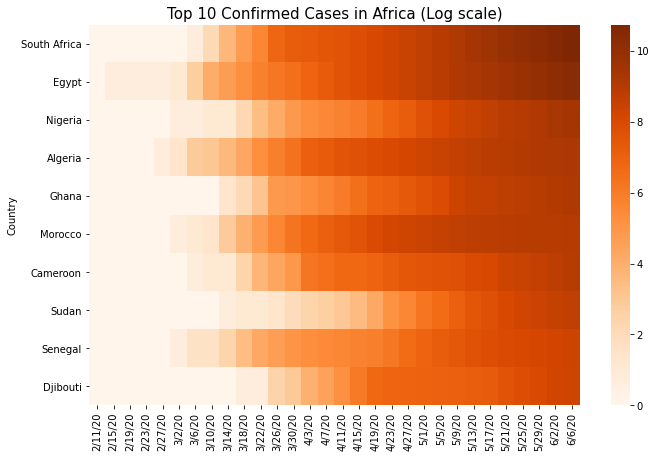

In [37]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Continent == 'Africa'") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

africa_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = africa_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in Africa (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

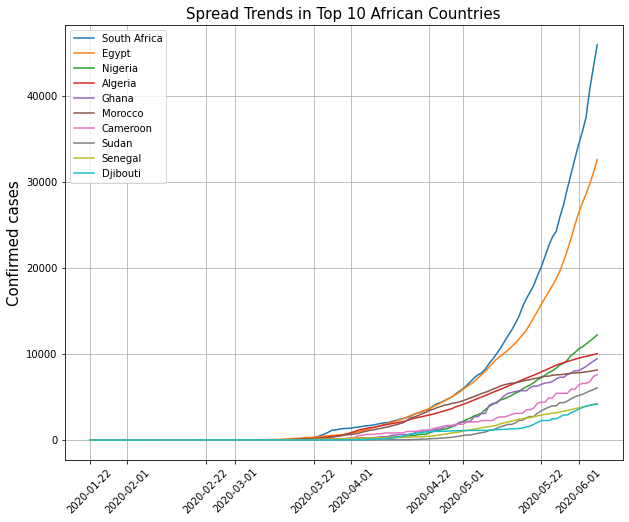

In [42]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in africa_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(africa_confirmed_top.columns), y=africa_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 African Countries", fontsize=15)
plt.show()

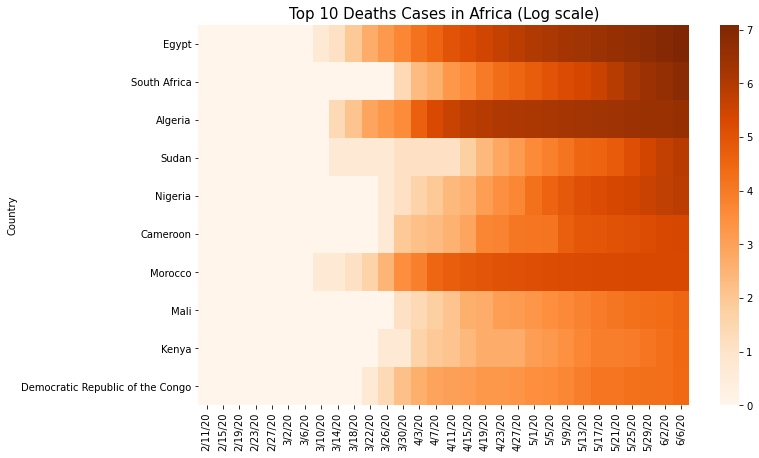

In [39]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Continent == 'Africa'") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

africa_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = africa_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in Africa (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

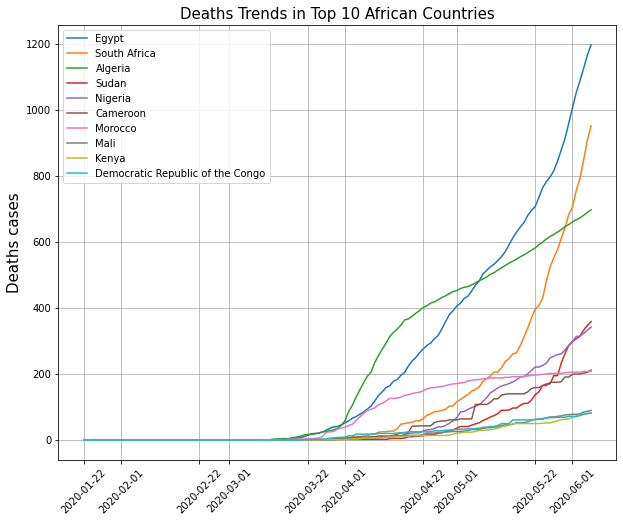

In [43]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in africa_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(africa_deaths_top.columns), y=africa_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 African Countries", fontsize=15)
plt.show()

### Spread across USA

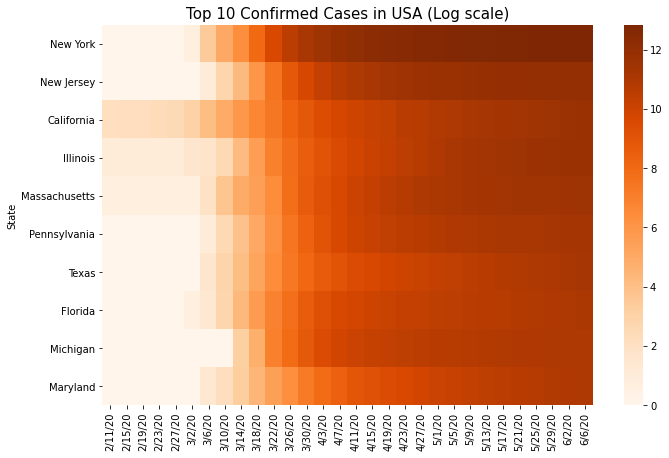

In [44]:
# Top 10 Confirmed Cases Heatmap
states = np.asarray(us_confirmed \
  .sort_values(us_confirmed.columns[-1], ascending=False).State[:10])

us_confirmed_top = us_confirmed.set_index("State").drop(["Population"], axis=1).loc[states,:]
temp = us_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in USA (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

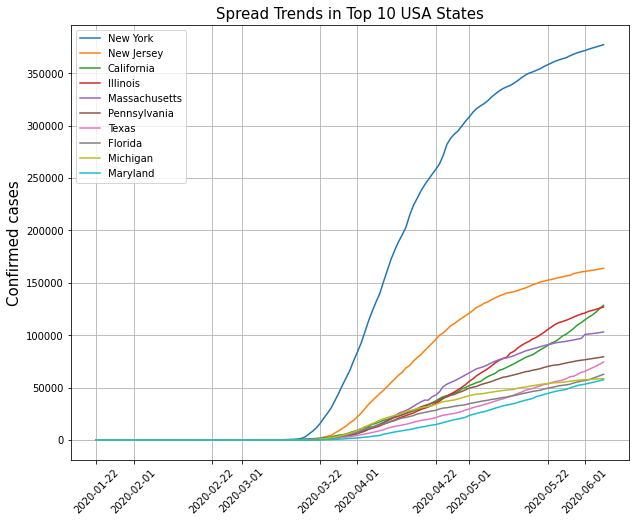

In [45]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in us_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(us_confirmed_top.columns), y=us_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 USA States", fontsize=15)
plt.show()

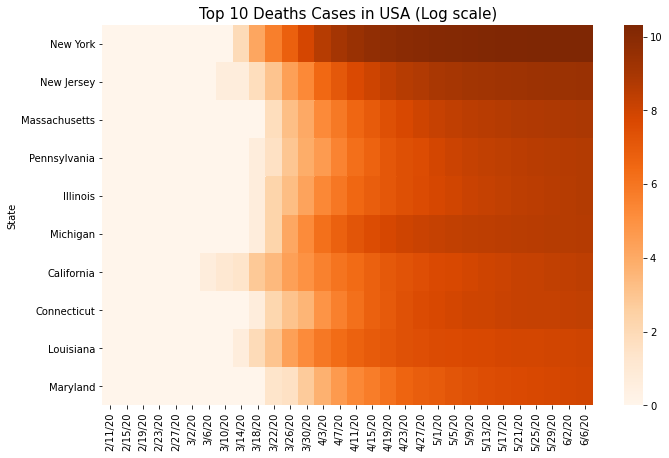

In [46]:
# Top 10 Deaths Cases Heatmap
states = np.asarray(us_deaths \
  .sort_values(us_deaths.columns[-1], ascending=False).State[:10])

us_deaths_top = us_deaths.set_index("State").drop(["Population"], axis=1).loc[states,:]
temp = us_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in USA (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

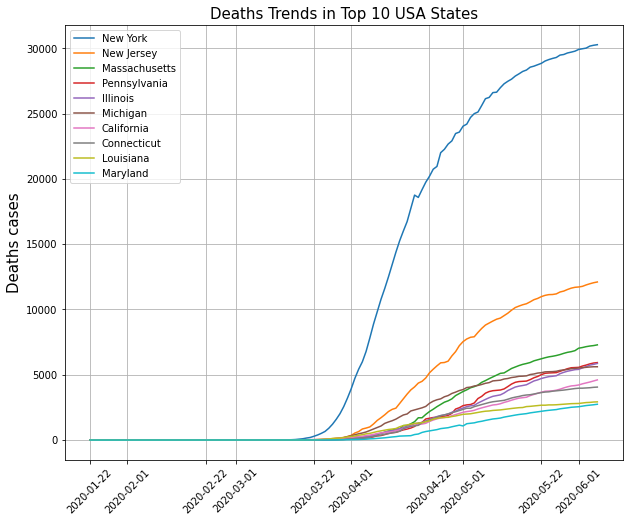

In [47]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in us_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(us_deaths_top.columns), y=us_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 USA States", fontsize=15)
plt.show()

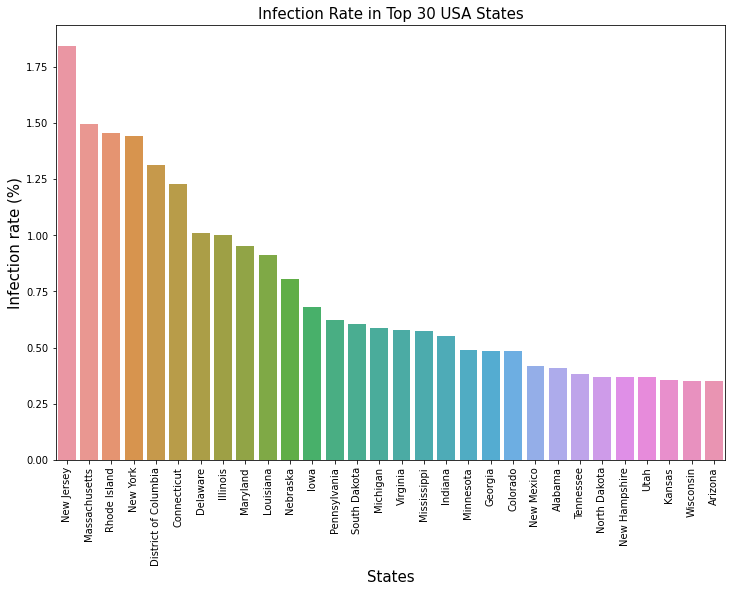

In [48]:
# Top 30 infection rate in the USA
rate = (us_confirmed.iloc[:, -1] / us_confirmed.Population * 100).round(3)
us_infection_rate = us_confirmed.State.to_frame().join(rate.to_frame(name="InfectionRate"))
us_infection_rate.InfectionRate.replace(np.inf, 0.000, inplace=True)

us_rate_top = us_infection_rate.sort_values("InfectionRate", ascending=False).iloc[:30]

plt.figure(figsize=(12, 8))
sns.barplot(x=us_rate_top.State, y=us_rate_top.InfectionRate)
plt.xticks(rotation=90)
plt.ylabel("Infection rate (%)", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.title("Infection Rate in Top 30 USA States", fontsize=15)
plt.show()

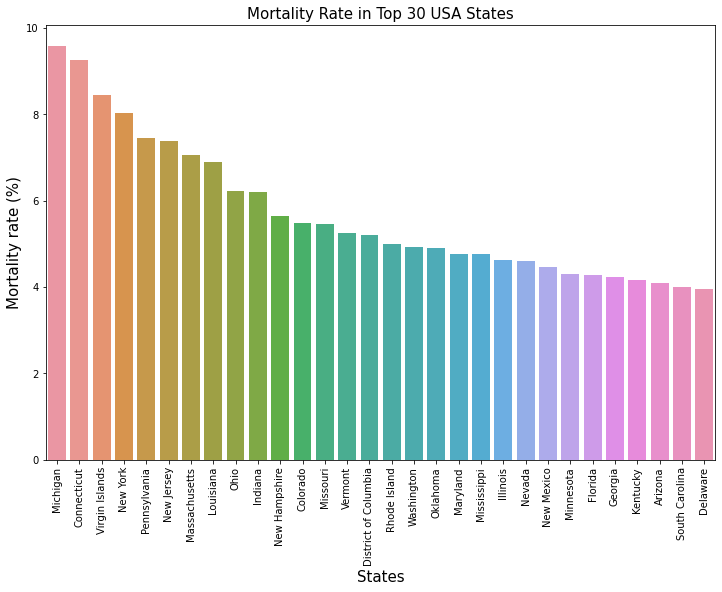

In [51]:
# Top 30 mortality rate in the USA
deaths_rate = (us_deaths.iloc[:, -1] / us_confirmed.iloc[:, -1] * 100).round(3)
us_mortality_rate = us_deaths.State.to_frame().join(deaths_rate.to_frame(name="InfectionRate"))
us_mortality_rate.InfectionRate.replace(np.inf, 0.000, inplace=True)

us_mortality_rate_top = us_mortality_rate.sort_values("InfectionRate", ascending=False).iloc[1:31]

plt.figure(figsize=(12, 8))
sns.barplot(x=us_mortality_rate_top.State, y=us_mortality_rate_top.InfectionRate)
plt.xticks(rotation=90)
plt.ylabel("Mortality rate (%)", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.title("Mortality Rate in Top 30 USA States", fontsize=15)
plt.show()